<h1> Desáfio 3 </h1>

In [1166]:
import pandas as pd
import numpy as np
from collections import Counter
import plotly
import gradio as gr
from numpy import mean
from numpy import std
# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import folium
#modelagem

from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn import under_sampling
from imblearn import over_sampling
from sklearn.model_selection import StratifiedKFold # Essa biblioteca mistura os dados e garante que todos tenham informação
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn import preprocessing 


# biblioteca Geração de Features
import featuretools as ft

# Aplicando ajuste dos hiperparametros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [559]:
#fazendo a leitura do arquivo csv
german = pd.read_csv('german.csv', header=0, delim_whitespace=True,index_col=False,  names=["Status Conta Corrente", "Meses De Duracao", "Historico Credito", "Aquisicao", "Credito $",
                                                                          "Conta Poupanca/titulos", "Tempo Empregado", "Taxa Parcelamento %", "Sex/Satus", "Outros Devedores",
                                                                          "Tempo de residencia", "Propriedade", "idade", "Outros Planos de Parcelamento", "Habitacao", "N° Credito No banco",
                                                                          "Trabalho", "N° Pessoas na familia", "Telefone", "trabalhador Extrangeiro", "Target"])

<h2>Questão N° 2 </h2>

In [ ]:
german

In [564]:
import mitosheet
mitosheet.sheet(german, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-b04ad2cf-f720-4303-a133-e1d47a46605f", "code": {"imports…

In [ ]:
from mitosheet import *; register_analysis('UUID-b547f6fc-ac8e-42a0-a1d5-b7f25b2c21ee')

# Drop duplicates in german
german = german.drop_duplicates(subset=['Meses De Duracao', 'Credito $', 'Taxa Parcelamento %', 'Tempo de residencia', 'idade', 'N° Credito No banco', 'N° Pessoas na familia', 'Target'], keep='first')

# Drop duplicates in german
german = german.drop_duplicates(subset=['Meses De Duracao', 'Credito $', 'Taxa Parcelamento %', 'Tempo de residencia', 'idade', 'N° Credito No banco', 'N° Pessoas na familia', 'Target'], keep='first')

# Pivoted german into df2
unused_columns = german.columns.difference(set(['Target']).union(set(['Credito $'])).union(set({'Meses De Duracao'})))
tmp_df = german.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['Target'],
    columns=['Credito $'],
    values=['Meses De Duracao'],
    aggfunc={'Meses De Duracao': ['sum']}
)
pivot_table.columns = [flatten_column_header(col) for col in pivot_table.columns.values]
german_pivot = pivot_table.reset_index()

# Deleted dataframe german_pivot
del german_pivot


In [560]:
print(german.shape) # verificando o número de linhas e colunas

(999, 21)


In [561]:
#Verificando a estrtura da nosa base de dados
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Status Conta Corrente          999 non-null    object
 1   Meses De Duracao               999 non-null    int64 
 2   Historico Credito              999 non-null    object
 3   Aquisicao                      999 non-null    object
 4   Credito $                      999 non-null    int64 
 5   Conta Poupanca/titulos         999 non-null    object
 6   Tempo Empregado                999 non-null    object
 7   Taxa Parcelamento %            999 non-null    int64 
 8   Sex/Satus                      999 non-null    object
 9   Outros Devedores               999 non-null    object
 10  Tempo de residencia            999 non-null    int64 
 11  Propriedade                    999 non-null    object
 12  idade                          999 non-null    int64 
 13  Outro

In [565]:
#alterando o tipo das colunas objeto para string
german_1= german[['Status Conta Corrente','Historico Credito','Aquisicao', 'Conta Poupanca/titulos', 'Tempo Empregado', 'Sex/Satus', 
        'Outros Devedores', 'Propriedade', 'Outros Planos de Parcelamento', 'Habitacao', 'Trabalho', 'Telefone', 
             'trabalhador Extrangeiro']].astype('string')
german_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Status Conta Corrente          999 non-null    string
 1   Historico Credito              999 non-null    string
 2   Aquisicao                      999 non-null    string
 3   Conta Poupanca/titulos         999 non-null    string
 4   Tempo Empregado                999 non-null    string
 5   Sex/Satus                      999 non-null    string
 6   Outros Devedores               999 non-null    string
 7   Propriedade                    999 non-null    string
 8   Outros Planos de Parcelamento  999 non-null    string
 9   Habitacao                      999 non-null    string
 10  Trabalho                       999 non-null    string
 11  Telefone                       999 non-null    string
 12  trabalhador Extrangeiro        999 non-null    string
dtypes: st

In [7]:
#excluindo as variáveis que foram alterada o dtype
german = german.drop(columns=['Status Conta Corrente','Historico Credito','Aquisicao', 'Conta Poupanca/titulos', 'Tempo Empregado', 'Sex/Satus', 
        'Outros Devedores', 'Propriedade', 'Outros Planos de Parcelamento', 'Habitacao', 'Trabalho', 'Telefone', 
             'trabalhador Extrangeiro'], axis=1)
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Meses De Duracao       999 non-null    int64
 1   Credito $              999 non-null    int64
 2   Taxa Parcelamento %    999 non-null    int64
 3   Tempo de residencia    999 non-null    int64
 4   idade                  999 non-null    int64
 5   N° Credito No banco    999 non-null    int64
 6   N° Pessoas na familia  999 non-null    int64
 7   Target                 999 non-null    int64
dtypes: int64(8)
memory usage: 62.6 KB


In [8]:
#juntanto a base german_1 a base german

german_final = pd.concat([german, german_1], axis=1)
german_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Meses De Duracao               999 non-null    int64 
 1   Credito $                      999 non-null    int64 
 2   Taxa Parcelamento %            999 non-null    int64 
 3   Tempo de residencia            999 non-null    int64 
 4   idade                          999 non-null    int64 
 5   N° Credito No banco            999 non-null    int64 
 6   N° Pessoas na familia          999 non-null    int64 
 7   Target                         999 non-null    int64 
 8   Status Conta Corrente          999 non-null    string
 9   Historico Credito              999 non-null    string
 10  Aquisicao                      999 non-null    string
 11  Conta Poupanca/titulos         999 non-null    string
 12  Tempo Empregado                999 non-null    string
 13  Sex/S

In [9]:
#Fazendo uma verificação se não existe dados nulos 
german_final.isnull().sum()

Meses De Duracao                 0
Credito $                        0
Taxa Parcelamento %              0
Tempo de residencia              0
idade                            0
N° Credito No banco              0
N° Pessoas na familia            0
Target                           0
Status Conta Corrente            0
Historico Credito                0
Aquisicao                        0
Conta Poupanca/titulos           0
Tempo Empregado                  0
Sex/Satus                        0
Outros Devedores                 0
Propriedade                      0
Outros Planos de Parcelamento    0
Habitacao                        0
Trabalho                         0
Telefone                         0
trabalhador Extrangeiro          0
dtype: int64

In [10]:
# Salvamos a nova estruta de dados em disco
german_final.to_csv('german_v1.csv', encoding = "utf-8", index = False)

## Correlação

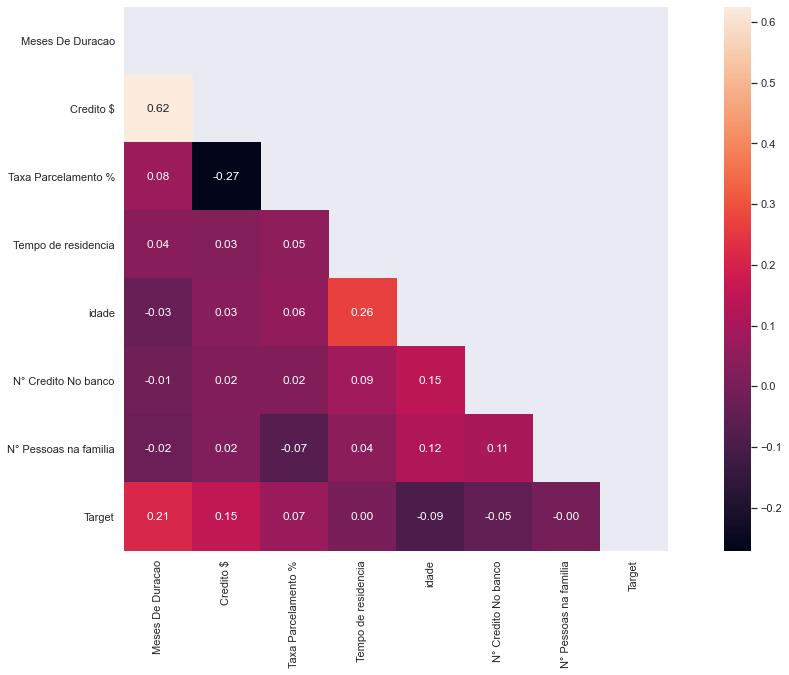

In [11]:
corrmat = german_final.corr()
sns.set(font_scale=1.0)
f, ax = plt.subplots(figsize=(20, 10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))
hm = sns.heatmap(corrmat, 
                 mask=mask,
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 12}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)


 ## Lista de correlações

In [12]:
corrmat_lower = (corrmat*~mask).replace({0.0:np.nan}).round(2)
corr_list = abs(corrmat_lower).stack(dropna=True)\
                              .reset_index()\
                              .rename({'level_0':'var_1','level_1':'var_2',0:'corr'}, axis=1)\
                              .sort_values(by='corr', ascending=False)\
                              .head(20)
corr_list

,var_1,var_2,corr
0,Credito $,Meses De Duracao,0.62
2,Taxa Parcelamento %,Credito $,0.27
9,idade,Tempo de residencia,0.26
21,Target,Meses De Duracao,0.21
22,Target,Credito $,0.15
...,...,...,...
26,Target,N° Credito No banco,0.05
3,Tempo de residencia,Meses De Duracao,0.04
18,N° Pessoas na familia,Tempo de residencia,0.04
4,Tempo de residencia,Credito $,0.03


* ##### As variáveis mais correlacionadas  a variável target seria crédito, taxa de parcelamento, idade e os meses de duração do crédito

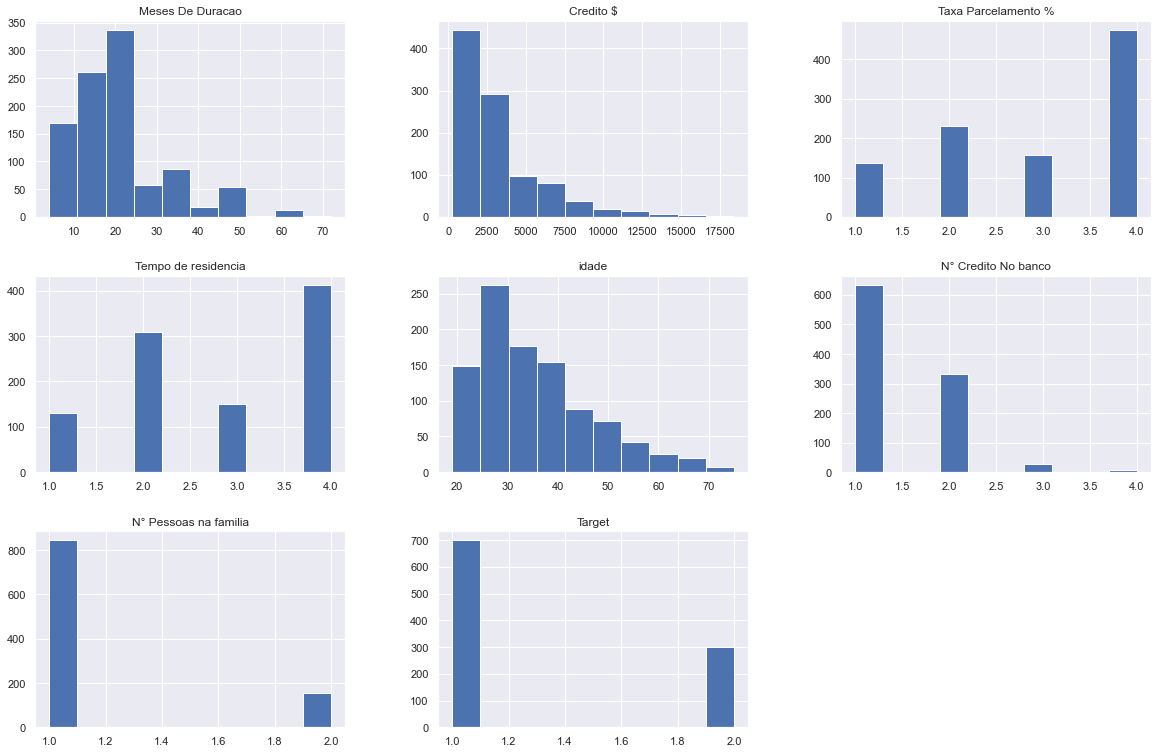

In [13]:
german_final.hist(figsize=(20,13));

* <h7> Da para verificar que a média de crédito adquirida pelas pessoas está em torno  de $1.000,00 - $2.000,00(o pico está em usar crédito para compras de pequeno valor), a idade que favorece a isso está na faixa dos 30(onde se percebe que é pico na aquisição de crédito.</h7>
 
* <h7>As pessoas que moram sozinhas são as que mais adquirem crédito </h7>

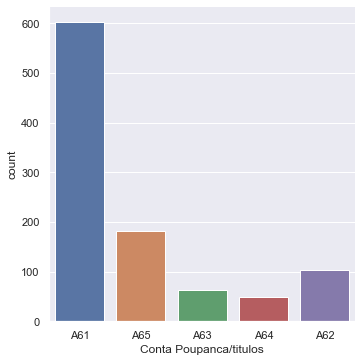

In [40]:

# Analisando a conta poupança
sns.factorplot('Conta Poupanca/titulos', data=german_final, kind='count')

* <h7>As pessoas que mais pegam crédito tem é porque não tem uma reserva, o pico é que a maioria das pessoas tem um saldo na poupança inferior a 110 DM</h7>

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\seaborn\categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



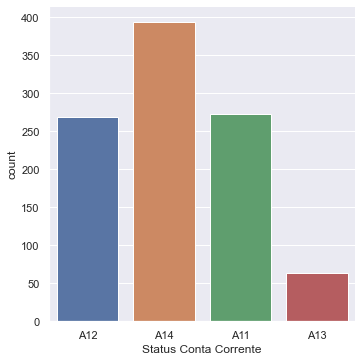

In [42]:

# Analisando conta corrente
sns.factorplot('Status Conta Corrente', data=german_final, kind='count')

* <h7>A maioria das pessoas tem um saldo inferior a 220 DM em sua conta corrente</h7>

<h2> Questão N° 3 </h2>

### MODELAGEM

In [570]:
# Separando variável target das preditoras
y = german_final['Target']
X = german_final.drop( ['Target'], axis=1)

In [571]:
# transformando  classe negativa 2 para 0 e   classe positiva para to 1
y = y.apply(lambda x: 0 if x == 2 else 1)
y

0      0
1      1
2      1
3      0
4      1
      ..
994    1
995    1
996    1
997    0
998    1
Name: Target, Length: 999, dtype: int64

In [573]:
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
ct = ColumnTransformer([('o',OneHotEncoder(), cat_ix)], remainder='passthrough')
X = ct.fit_transform(X)

In [574]:
y.value_counts()

1    699
0    300
Name: Target, dtype: int64

### Normalizando os Dados com StandardScaler

In [606]:
preprocessing_pipe = Pipeline([
                                
                                ('OneHotEncoder', OneHotEncoder(sparse=False))
                            ])

In [630]:
X = preprocessing_pipe.fit_transform(X)

In [801]:
y.value_counts()

1    699
0    300
Name: Target, dtype: int64

#### Fazendo balanceamento da variavel target com a biblioteca imbalanced-learn

* Aplicando o Método over_sampling e under_sampling juntos para tentar atrair um melhor desempenho

In [802]:
# instanciando o over e o under
over = RandomOverSampler(sampling_strategy=0.90) #90¨% da classe majoritária 
under = RandomUnderSampler(sampling_strategy=0.90)# 90% da classe minoritária 


# aplicando a transformação over sampler
X_over, y_over = over.fit_resample(X, y)
# summarize class distribution
print(f"Oversampled: {Counter(y_over)}")



# aplicando a transformação de under sampler
X_under, y_under = under.fit_resample(X, y)

# summarize class distribution
print(f"UnderSampling: {Counter(y_under)}")


Oversampled: Counter({1: 699, 0: 629})
UnderSampling: Counter({1: 333, 0: 300})


### Separando os Dados de treino e de teste

In [807]:
x_train, x_test, y_train, y_test = train_test_split(X_over, y_over,  stratify=y_over, test_size=0.3, random_state=42 )

In [808]:
y_test.value_counts()

1    210
0    189
Name: Target, dtype: int64

#### Função Para definir os niveis de folds e calculo da média para validação cruzada

In [809]:
#  definiando o nivel de folds
cv = StratifiedKFold(n_splits = 47, shuffle = True)

# criando uma funca para ver a media da acuracia e o seu intervalo
def intervalo(results):
    mean = results.mean()
    data = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*data)*100, (mean + 2*data)*100))

    return intervalo

#### Treinando o modelo

In [811]:
LR = LogisticRegression(random_state=10, n_jobs=-1).fit(x_train, y_train)

#### Predição do modelo

In [812]:
# com os dados de treino
predicao_train = LR.predict(x_train)
predicao_train

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [813]:
# com os dados de teste
predicao_test = LR.predict(x_test)
predicao_test

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,

#### Avaliando o modelo com f1_score

In [814]:
# Verificando a média de f1_score dos dados de treino e teste
metrica_train = []
metrica_test = []
metrica_train.append(f1_score(y_train, predicao_train, average='micro'))
metrica_test.append(f1_score(y_test, predicao_test, average='micro'))

metrica_final_test = []
metrica_final_train = []
metrica_final_test.append(np.mean(metrica_test))
metrica_final_train.append(np.mean(metrica_train))
        

In [815]:
# calculando a diferenca entrer as métricas de treino e teste
diff_metrica= []
diff_final_metrica = []
diff_metrica.append(100*np.abs((f1_score(y_train, predicao_train, average='micro') - \
                                   f1_score(y_test, predicao_test, average='micro'))/\
                                  f1_score(y_test, predicao_test, average='micro')))
   
diff_final_metrica.append(np.mean(diff_metrica))
print(metrica_final_train)
print("\n------------------------------\n")
print(metrica_final_test)

[0.9418729817007535]

------------------------------

[0.7919799498746866]


In [816]:
print('diferença do f1_score das métricas de treino e teste=', diff_final_metrica)

diferença do f1_score das métricas de treino e teste= [18.92636699322808]


#### Analisando a performance

* Matriz de Confusão

In [817]:
# avaliando com os dados de treino
matris_random= pd.crosstab(y_train, predicao_train, rownames=['Real'], colnames=['Predito'], margins=True)
matris_random

Predito,0,1,All
Real,,,
0,415,25,440
1,29,460,489
All,444,485,929


In [818]:
# avaliando com os dados de teste
matris_test= pd.crosstab(y_test, predicao_test, rownames=['Real'], colnames=['Predito'], margins=True)
matris_test

Predito,0,1,All
Real,,,
0,160,29,189
1,54,156,210
All,214,185,399


#### Relatório de Classificação

In [819]:
#avaliando com os dados de traino
resultado_random_train = classification_report(y_train, predicao_train)
print(resultado_random_train)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       440
           1       0.95      0.94      0.94       489

    accuracy                           0.94       929
   macro avg       0.94      0.94      0.94       929
weighted avg       0.94      0.94      0.94       929



In [820]:
#avaliando com os dados de teste
resultado_extra_test = classification_report(y_test, predicao_test)
print(resultado_extra_test)

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       189
           1       0.84      0.74      0.79       210

    accuracy                           0.79       399
   macro avg       0.80      0.79      0.79       399
weighted avg       0.80      0.79      0.79       399



#### Aplicando Cross_Validation

In [822]:
# avaliando a acurácia  com os dado de treino
valid_extra = cross_val_score(LR, x_train,y_train, cv=cv, scoring= 'accuracy')
intervalo(valid_extra)

Acurácia média: 78.13%
Intervalo de acurácia: [61.26% ~ 95.00%]


<function __main__.intervalo(results)>

In [823]:
# verificando a acurácia  com os dado de teste
valid_test = cross_val_score(LR, x_test,y_test, cv=cv, scoring= 'accuracy')
intervalo(valid_test)

Acurácia média: 73.67%
Intervalo de acurácia: [45.76% ~ 101.58%]


<function __main__.intervalo(results)>

### Validando o Modelo

#### Matriz de confusão da validação cruzada

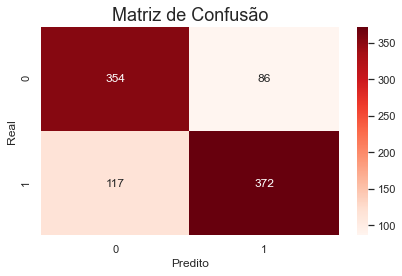

In [826]:
# avaliando com os dados de treino 
matriz_pred = cross_val_predict(LR, x_train, y_train, cv = 10)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

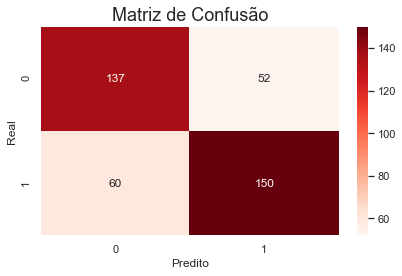

In [828]:
# avaliando com os dados de teste
matriz_pred_test = cross_val_predict(LR, x_test, y_test, cv =10)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, matriz_pred_test), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

#### Relatório de Classificação da validação cruzada

In [830]:
# avaliando com os dados de treino
resultado_valid = classification_report(y_train, matriz_pred)
print(resultado_valid)

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       440
           1       0.81      0.76      0.79       489

    accuracy                           0.78       929
   macro avg       0.78      0.78      0.78       929
weighted avg       0.78      0.78      0.78       929



In [831]:
# avaliando com os dados de teste
resultado_valid_test = classification_report(y_test, matriz_pred_test)
print(resultado_valid_test)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       189
           1       0.74      0.71      0.73       210

    accuracy                           0.72       399
   macro avg       0.72      0.72      0.72       399
weighted avg       0.72      0.72      0.72       399



#### Calculando o f1 score da validação cruzada

In [832]:
#aplicando aos dado de treino
scores_train = cross_val_score(
    LR, x_train, y_train, cv=10, scoring='f1_micro')
scores_train

array([0.83870968, 0.84946237, 0.79569892, 0.76344086, 0.8172043 ,
       0.75268817, 0.68817204, 0.83870968, 0.77419355, 0.69565217])

In [833]:
median_score_train = scores_train.mean()#calculando a média
median_score_train

0.7813931743805517

In [834]:
scores_test = cross_val_score(
    LR, x_test, y_test, cv=3, scoring='f1_micro')
scores_test

array([0.63909774, 0.65413534, 0.71428571])

In [835]:
median_score_teste = scores_test.mean()
median_score_teste

0.6691729323308272

In [836]:
# avaliando a diferença  entre os dados validados de treino e de teste
diferenca= median_score_train - median_score_teste

In [837]:
print('diferença do f1_score das métricas de treino e teste tem um overfiting =', diferenca.sum()*100,  '%')

diferença do f1_score das métricas de treino e teste tem um overfiting = 11.222024204972447 %


* O modelo criado com LogisticRegression não está apresentando uma performance muito boa, está com overfiting de 11% comparando os dados de treino com os dados teste, o modelo se ajusta muito bem ao conjunto de dados anteriormente observado, mas se mostra ineficaz para prever novos resultados.
* Vou tentar aplicar um ajuste nos hiperparâmetros para tentar melhorar a performance do modelo. 

<h2> Ajuste nos Hiperparâmetros </h2>

In [838]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [839]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)

#### Aplicando modelo de RandomizedSearchCV

In [840]:
Lr = LogisticRegression()
hip_lr= RandomizedSearchCV(Lr, grid, cv =cv, n_jobs=-1, random_state=42, scoring='recall', error_score=0)

In [882]:
hip_lr.fit(x_train, y_train)

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



RandomizedSearchCV(cv=StratifiedKFold(n_splits=47, random_state=None, shuffle=True),
                   error_score=0, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='recall')

#### Recuperando o melhor estimator

In [883]:
lg_best = hip_lr.best_estimator_
lg_best

LogisticRegression(C=10, penalty='l1', solver='saga')

#### Gerando o resultado final

In [884]:
resultado_final_test_lg = lg_best.predict(x_test)
resultado_final_test_lg

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [885]:
resultado_final_train_lg = lg_best.predict(x_train)
resultado_final_train_lg

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,

### Avaliando o modelo com f1_score

In [886]:
# Verificando a média de f1_score dos dados de treino e teste
ajuste_metrica_train = []
ajuste_metrica_test = []
ajuste_metrica_train.append(f1_score(y_train, resultado_final_train_lg, average='micro'))
ajuste_metrica_test.append(f1_score(y_test, resultado_final_test_lg, average='micro'))

ajuste_metrica_final_test = []
ajuste_metrica_final_train = []
ajuste_metrica_final_test.append(np.mean(ajuste_metrica_test))
ajuste_metrica_final_train.append(np.mean(ajuste_metrica_train))

In [887]:
# calculando a diferenca entrer as métricas de treino e teste
ajuste_diff_metrica= []
ajuste_diff_final_metrica = []
ajuste_diff_metrica.append(100*np.abs((f1_score(y_train,resultado_final_train_lg, average='micro') - \
                                   f1_score(y_test, resultado_final_test_lg, average='micro'))/\
                                  f1_score(y_test, resultado_final_test_lg, average='micro')))
   
ajuste_diff_final_metrica.append(np.mean(ajuste_diff_metrica))

In [888]:
print(ajuste_metrica_final_train)
print("\n------------------------------\n")
print(ajuste_metrica_final_test)

[0.8202368137782562]

------------------------------

[0.7368421052631579]


In [889]:
print('diferença do f1_score das métricas de treino e teste=', ajuste_diff_final_metrica)

diferença do f1_score das métricas de treino e teste= [11.317853298477631]


#### Aplicando validacao Cruzada

In [890]:
score_sv = cross_val_score(
    lg_best, x_test, y_test, cv=10, scoring='f1_micro')

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning

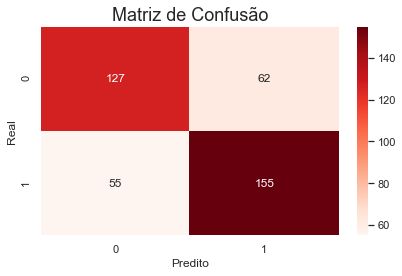

In [891]:
# avaliando com os dados de teste
matriz_test_rd = cross_val_predict(lg_best, x_test, y_test, cv =10)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, matriz_test_rd), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

In [1162]:
# avaliando com os dados de teste
resultado_test_lg = classification_report(y_test, matriz_test_rd)
print(resultado_test_lg)

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       189
           1       0.71      0.74      0.73       210

    accuracy                           0.71       399
   macro avg       0.71      0.71      0.71       399
weighted avg       0.71      0.71      0.71       399



In [892]:
score_sv= score_sv.mean()
score_sv

0.7066666666666668

In [893]:
score_lg_train = cross_val_score(
    lg_best, X_over, y_over, cv=10, scoring='f1_micro')

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



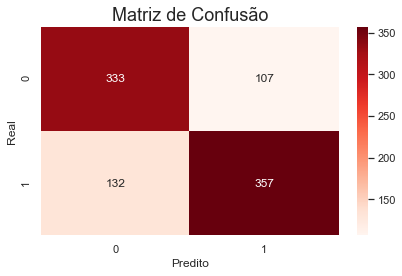

In [897]:
# avaliando com os dados de treino 
matriz_rd = cross_val_predict(lg_best, x_train, y_train, cv = 5)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_rd), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

In [1161]:
# avaliando com os dados de train
resultado_train_lg = classification_report(y_train, matriz_rd)
print(resultado_train_lg)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       440
           1       0.77      0.73      0.75       489

    accuracy                           0.74       929
   macro avg       0.74      0.74      0.74       929
weighted avg       0.74      0.74      0.74       929



In [898]:
score_lg_train= score_lg_train.mean()
score_lg_train

0.7567953975848712

In [899]:
dff_metrica_final_sv = score_lg_train - score_sv 

In [900]:
print('diferença do f1_score das métricas de treino e teste tem um overfiting =', dff_metrica_final_sv*100,  '%')

diferença do f1_score das métricas de treino e teste tem um overfiting = 5.012873091820447 %


#### Ultilizando o modelo GridSearchCV

In [901]:
hip_lr_grid= GridSearchCV(Lr, grid, cv =cv, n_jobs=-1, scoring='recall', error_score=0)

In [902]:
hip_lr_grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=47, random_state=None, shuffle=True),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall')

#### Recuperando o melhor estimator

In [903]:
lg_best_grid = hip_lr_grid.best_estimator_
lg_best_grid

LogisticRegression(C=0.01, penalty='l1', solver='saga')

#### Gerando o resultado final

In [904]:
resultado_final_test_grid = lg_best_grid.predict(x_test)
resultado_final_test_grid

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [906]:
resultado_final_train_grid = lg_best_grid.predict(x_train)
resultado_final_train_grid

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Avaliando o modelo com f1_score

In [907]:
# Verificando a média de f1_score dos dados de treino e teste
ajuste_metrica_train_grid = []
ajuste_metrica_test_grid = []
ajuste_metrica_train_grid.append(f1_score(y_train, resultado_final_train_grid, average='micro'))
ajuste_metrica_test_grid.append(f1_score(y_test, resultado_final_test_grid, average='micro'))

ajuste_metrica_final_test_grid = []
ajuste_metrica_final_train_grid = []
ajuste_metrica_final_test_grid.append(np.mean(ajuste_metrica_test_grid))
ajuste_metrica_final_train_grid.append(np.mean(ajuste_metrica_train_grid))

In [908]:
# calculando a diferenca entrer as métricas de treino e teste
ajuste_diff_metrica_grid= []
ajuste_diff_final_metrica_grid = []
ajuste_diff_metrica_grid.append(100*np.abs((f1_score(y_train,resultado_final_train_grid, average='micro') - \
                                   f1_score(y_test, resultado_final_test_grid, average='micro'))/\
                                  f1_score(y_test, resultado_final_test_grid, average='micro')))
   
ajuste_diff_final_metrica_grid.append(np.mean(ajuste_diff_metrica_grid))

In [909]:
print(ajuste_metrica_final_train_grid)
print("\n------------------------------\n")
print(ajuste_metrica_final_test_grid)

[0.5263724434876211]

------------------------------

[0.5263157894736842]


In [910]:
print('diferença do f1_score das métricas de treino e teste=', ajuste_diff_final_metrica_grid)

diferença do f1_score das métricas de treino e teste= [0.010764262648020884]


#### Aplicando validacao Cruzada

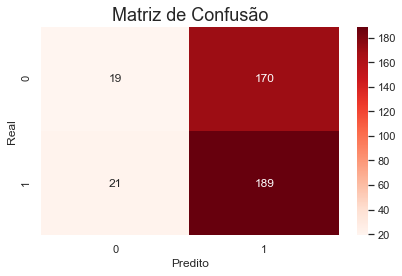

In [911]:
# avaliando com os dados de teste
matriz_test_grid = cross_val_predict( lg_best_grid, x_test, y_test, cv =10)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, matriz_test_grid), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

In [912]:
score_grid = cross_val_score(
    lg_best_grid, x_test, y_test, cv=10, scoring='f1_micro')

In [913]:
score_grid= score_grid.mean()
score_grid

0.5263461538461539

In [915]:
score_lg_grid_train = cross_val_score(
    lg_best_grid, x_train, y_train, cv=10, scoring='f1_micro')

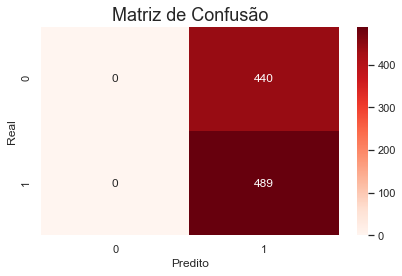

In [920]:
# avaliando com os dados de treino 
matriz_grid = cross_val_predict(lg_best_grid, x_train, y_train, cv = 5)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_grid), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

In [921]:
score_lg_grid_train= score_lg_grid_train.mean()
score_lg_grid_train

0.526367461430575

In [922]:
dff_metrica_final_grid = score_lg_grid_train - score_grid

In [923]:
print('diferença do f1_score das métricas de treino e teste tem um overfiting =', dff_metrica_final_grid*100,  '%')

diferença do f1_score das métricas de treino e teste tem um overfiting = 0.002130758442109304 %


* Aplicando os ajustes também não melhorou, acabou tendo  uma maior queda de performance.

<h2>Questão N°4 </h2>

###  Modelo com RandomForestClassifier

* Treinando o modelo

In [1051]:
randomForestClassifer = RandomForestClassifier(max_depth=20, n_estimators=100, max_samples=50, random_state=42)

In [1052]:
randomForestClassifer.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_samples=50, random_state=42)

In [1053]:
# com os dados de treino
predicao_random_train = randomForestClassifer.predict(x_train)
predicao_random_train

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [1054]:
# com os dados de teste
predicao_random_test = randomForestClassifer.predict(x_test)
predicao_random_test

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,

### Avaliando o modelo com f1_score

In [1055]:
# Verificando a média de f1_score dos dados de treino e teste
metrica_train_random = []
metrica_test_random = []
metrica_train_random.append(f1_score(y_train, predicao_random_train, average='micro'))
metrica_test_random.append(f1_score(y_test, predicao_random_test, average='micro'))

metrica_final_test_random = []
metrica_final_train_random = []
metrica_final_test_random.append(np.mean(metrica_test_random))
metrica_final_train_random.append(np.mean(metrica_train_random))
        

In [1056]:
# calculando a diferenca entrer as métricas de treino e teste
diff_metrica_random= []
diff_final_metrica_random = []
diff_metrica_random.append(100*np.abs((f1_score(y_train, predicao_random_train, average='micro') - \
                                   f1_score(y_test, predicao_random_test, average='micro'))/\
                                  f1_score(y_test, predicao_random_test, average='micro')))
   
diff_final_metrica_random.append(np.mean(diff_metrica_random))

In [1057]:
print(metrica_final_train_random)
print("\n------------------------------\n")
print(metrica_final_test_random)

[0.797631862217438]

------------------------------

[0.681704260651629]


In [1058]:
print('diferença do f1_score das métricas de treino e teste=', diff_final_metrica_random)


diferença do f1_score das métricas de treino e teste= [17.00555625910212]


#### Analisando a performance

#### Matriz de Confusão

In [1059]:
# avaliando com os dados de treino
matris_random= pd.crosstab(y_train, predicao_random_train, rownames=['Real'], colnames=['Predito'], margins=True)
matris_random

Predito,0,1,All
Real,,,
0,309,131,440
1,57,432,489
All,366,563,929


In [1060]:
# avaliando com os dados de teste
matris_random_test= pd.crosstab(y_test, predicao_random_test, rownames=['Real'], colnames=['Predito'], margins=True)
matris_random_test

Predito,0,1,All
Real,,,
0,99,90,189
1,37,173,210
All,136,263,399


#### Relatório de Classificação

In [1061]:
#avaliando com os dados de traino
resultado_random_train = classification_report(y_train, predicao_random_train)
print(resultado_random_train)

              precision    recall  f1-score   support

           0       0.84      0.70      0.77       440
           1       0.77      0.88      0.82       489

    accuracy                           0.80       929
   macro avg       0.81      0.79      0.79       929
weighted avg       0.80      0.80      0.80       929



In [1062]:
#avaliando com os dados de teste
resultado_random_test = classification_report(y_test, predicao_random_test)
print(resultado_random_test)

              precision    recall  f1-score   support

           0       0.73      0.52      0.61       189
           1       0.66      0.82      0.73       210

    accuracy                           0.68       399
   macro avg       0.69      0.67      0.67       399
weighted avg       0.69      0.68      0.67       399



#### Aplicando Cross_Validation

In [977]:
# avaliando a acurácia  com os dado de treino
valid_extra = cross_val_score(randomForestClassifer, x_train,y_train, cv=cv, scoring= 'accuracy')
intervalo(valid_extra)

Acurácia média: 70.42%
Intervalo de acurácia: [49.40% ~ 91.44%]


<function __main__.intervalo(results)>

In [978]:
# verificando a acurácia  com os dado de teste
valid_test = cross_val_score(randomForestClassifer, x_test,y_test, cv=cv, scoring= 'accuracy')
intervalo(valid_test)

Acurácia média: 68.91%
Intervalo de acurácia: [38.59% ~ 99.23%]


<function __main__.intervalo(results)>

### Validando o Modelo

#### Matriz de confusão da validação cruzada

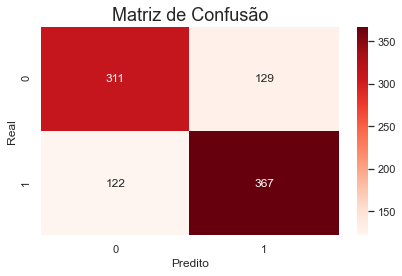

In [1063]:
# avaliando com os dados de treino 
matriz_pred_rd = cross_val_predict(randomForestClassifer, x_train, y_train, cv = 10)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_pred_rd), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

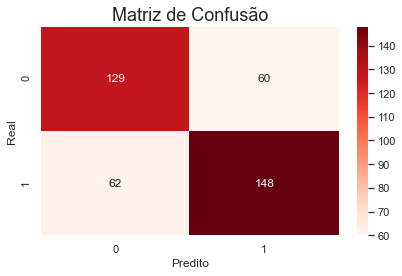

In [1064]:
# avaliando com os dados de teste
matriz_pred_test_rd = cross_val_predict(randomForestClassifer, x_test, y_test, cv =10)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, matriz_pred_test_rd), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

#### Relatório de Classificação da validação cruzada

In [1065]:
# avaliando com os dados de treino
resultado_valid_rd = classification_report(y_train, matriz_pred_rd)
print(resultado_valid_rd)

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       440
           1       0.74      0.75      0.75       489

    accuracy                           0.73       929
   macro avg       0.73      0.73      0.73       929
weighted avg       0.73      0.73      0.73       929



In [1066]:
# avaliando com os dados de teste
resultado_valid_test_rd = classification_report(y_test, matriz_pred_test_rd)
print(resultado_valid_test_rd)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       189
           1       0.71      0.70      0.71       210

    accuracy                           0.69       399
   macro avg       0.69      0.69      0.69       399
weighted avg       0.69      0.69      0.69       399



#### Calculando o f1 score da validação cruzada

In [1067]:
#aplicando aos dado de treino
scores_train_rd = cross_val_score(
    randomForestClassifer, x_train, y_train, cv=10, scoring='f1_micro')
scores_train_rd

array([0.77419355, 0.83870968, 0.70967742, 0.74193548, 0.75268817,
       0.65591398, 0.69892473, 0.75268817, 0.7311828 , 0.64130435])

In [1068]:
median_score_train_rd = scores_train.mean()#calculando a média
median_score_train_rd

0.7813931743805517

In [1069]:
scores_test_rd = cross_val_score(
    randomForestClassifer, x_test, y_test, cv=3, scoring='f1_micro')
scores_test_rd

array([0.68421053, 0.69172932, 0.7443609 ])

In [1070]:
median_score_teste_rd = scores_test.mean()
median_score_teste_rd

0.6691729323308272

In [1071]:
# avaliando a diferença  entre os dados validados de treino e de teste
diferenca_rd= median_score_train_rd - median_score_teste_rd

In [1072]:
print('diferença do f1_score das métricas de treino e teste tem um overfiting =', diferenca_rd.sum()*100,  '%')

diferença do f1_score das métricas de treino e teste tem um overfiting = 11.222024204972447 %


### Ajuste nos Hiperparâmetros 

#### Aplicando modelo de RandomizedSearchCV

In [1073]:
parametros_4= {
 
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20],
 'min_impurity_split': [0.1]

}

In [1116]:
parametros = {
    'bootstrap': [True],
    'max_depth': [80, 110],
    'min_samples_leaf': [1,10],
    'min_samples_split': [2,10],
    'n_estimators': [20, 50, 100],
    'criterion':['entropy'],
    'min_impurity_split': [0.1] 
}

In [1137]:
rf = randomForestClassifer
random_rf = RandomizedSearchCV(rf, parametros_4, cv =cv, n_jobs=-1, random_state=7)

In [1138]:
random_rf.fit(x_train, y_train)

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_

RandomizedSearchCV(cv=StratifiedKFold(n_splits=47, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(max_depth=20,
                                                    max_samples=50,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80],
                                        'max_features': ['auto'],
                                        'min_impurity_split': [0.1],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20]},
                   random_state=7)

#### Recuperando o melhor estimator

In [1139]:
print('Melhor comprimento máximo da árvore: {}'.format(random_rf.best_params_['max_depth']))
print('Melhor comprimento mínimo da árvore: {}'.format(random_rf.best_params_['min_samples_leaf']))
print(' Desempenho do melhor modelo(Score) dados de treino: {}'.format(round(random_rf.best_score_,5)))
print('Tempo para realizar a Otimização:') 
%timeit -n 1 -r 1 random_rf

Melhor comprimento máximo da árvore: 70
Melhor comprimento mínimo da árvore: 1
 Desempenho do melhor modelo(Score) dados de treino: 0.66932
Tempo para realizar a Otimização:
900 ns ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Recuperando o melhor estimator

In [1140]:
rf_best = random_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=70, max_samples=50, min_impurity_split=0.1,
                       min_samples_split=10, n_estimators=20, random_state=42)

#### Gerando o resultado final

In [1141]:
resultado_final_test_rd = rf_best.predict(x_test)
resultado_final_test_rd

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [1142]:
resultado_final_train_rd = rf_best.predict(x_train)
resultado_final_train_rd

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,

### Avaliando o modelo com f1_score

In [1143]:
# Verificando a média de f1_score dos dados de treino e teste
ajuste_metrica_train_rd = []
ajuste_metrica_test_rd = []
ajuste_metrica_train_rd.append(f1_score(y_train, resultado_final_train_rd, average='micro'))
ajuste_metrica_test_rd.append(f1_score(y_test, resultado_final_test_rd, average='micro'))

ajuste_metrica_final_test_rd = []
ajuste_metrica_final_train_rd = []
ajuste_metrica_final_test_rd.append(np.mean(ajuste_metrica_test_rd))
ajuste_metrica_final_train_rd.append(np.mean(ajuste_metrica_train_rd))

In [1144]:
# calculando a diferenca entrer as métricas de treino e teste
ajuste_diff_metrica_rd= []
ajuste_diff_final_metrica_rd = []
ajuste_diff_metrica_rd.append(100*np.abs((f1_score(y_train,resultado_final_train_rd, average='micro') - \
                                   f1_score(y_test, resultado_final_test_rd, average='micro'))/\
                                  f1_score(y_test, resultado_final_test_rd, average='micro')))
   
ajuste_diff_final_metrica_rd.append(np.mean(ajuste_diff_metrica_rd))

In [1145]:
print(ajuste_metrica_final_train_rd)
print("\n------------------------------\n")
print(ajuste_metrica_final_test_rd)

[0.7222820236813778]

------------------------------

[0.6416040100250626]


In [1146]:
print('diferença do f1_score das métricas de treino e teste=', ajuste_diff_final_metrica_rd)

diferença do f1_score das métricas de treino e teste= [12.574424784714754]


#### Aplicando validacao Cruzada

In [1147]:
score_rd_vd = cross_val_score(
    rf_best, x_test, y_test, cv=10, scoring='f1_micro')

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_

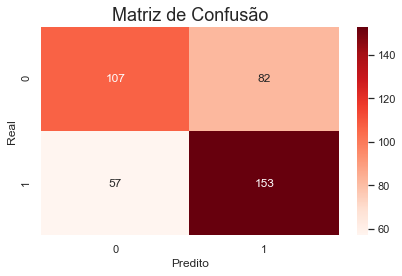

In [1148]:
# avaliando com os dados de teste
matriz_test_rand = cross_val_predict(rf_best, x_test, y_test, cv =10)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, matriz_test_rand), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

In [1156]:
# avaliando com os dados de teste
resultado_test_rd = classification_report(y_test, matriz_test_rd)
print(resultado_test_rd)

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       189
           1       0.71      0.74      0.73       210

    accuracy                           0.71       399
   macro avg       0.71      0.71      0.71       399
weighted avg       0.71      0.71      0.71       399



In [1149]:
score_rd_vd = score_rd_vd.mean()
score_rd_vd

0.6517307692307692

In [1150]:
score_rd_train_vd = cross_val_score(
    rf_best, x_train, y_train, cv=10, scoring='f1_micro')

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Qintess\anaconda3\envs\projeto\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning:

The min_

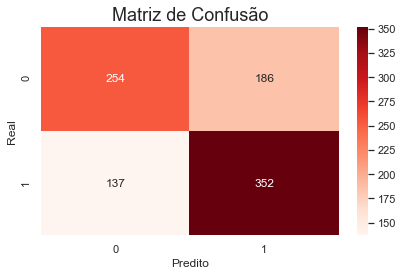

In [1151]:
# avaliando com os dados de treino 
matriz_rand = cross_val_predict(rf_best, x_train, y_train, cv = 5)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, matriz_rand), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Real")
ax.set_xlabel("Predito")
plt.tight_layout()

In [1155]:
# avaliando com os dados de treino
resultado_rd = classification_report(y_train, matriz_rd)
print(resultado_rd)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       440
           1       0.77      0.73      0.75       489

    accuracy                           0.74       929
   macro avg       0.74      0.74      0.74       929
weighted avg       0.74      0.74      0.74       929



In [1152]:
score_rd_train_vd = score_rd_train_vd.mean()
score_rd_train_vd

0.6704885460495559

In [1153]:
dff_metrica_final_rand = score_rd_train_vd - score_rd_vd

In [1154]:
print('diferença do f1_score das métricas de treino e teste tem um overfiting =', dff_metrica_final_rand*100,  '%')

diferença do f1_score das métricas de treino e teste tem um overfiting = 1.8757776818786653 %
